## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [142]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# To install Imbalance learn
!pip install imblearn --user

!pip install imbalanced-learn --user

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics


# To install Imbalance learn
!pip install imblearn --user

!pip install imbalanced-learn --user

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
churner = pd.read_csv("C:\\Users\\user\\Downloads\\BankChurners.csv")

### Checking the shape of the dataset

In [4]:
# Checking the number of rows and columns in the data
churner.shape

(10127, 21)

- the dataset has 10127 number of rows
- then has 21 columns

In [5]:
# let's create a copy of the data
data = churner.copy()

### Displaying the first few rows of the dataset

In [7]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


- obviously some columns have object datatype
- some columns have int datatype
- some columns have float data type

In [9]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [10]:
# checking for the data types of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- out 21 columns in the dataset, we have 10 datatypes as int64
-  5 are float64 of data types
- 6 are object of data types
- memory size usage is 1.6+ MB, which i would later convert the object data types to categorical data types to save memory usage.
- 'Education_Level' has 8608 values out of 10127 total values
- 'Marital_Status' has 9378 values out of 10127 total values
- showing that there would be missing values in the dataset

### Checking for duplicate values

In [11]:
# checking for duplicates in the dataset
data.duplicated().sum()

0

- there are no duplicate in the data set

### Checking for missing values

# checking for missing values in the dataset

In [13]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

- Education_Level column has 15% missing values out of the total observations
- Marital_Status column has 7% missing values out of the total observations
- i will impute these values after i split the data into train, validation and test sets

In [15]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


- CLIENTNUM: being a unique identifier doesnt add any meaning to the analysis and could be dropped
- Customer_Age: the average customer age is 46, minimun age is 26, maximum is 73 years
- Dependent_count: the average dependents count is 2, min is 0, max is 5
- Months_on_book: the average Month on book is 35, min 13, max is 56
- Total_Relationship_Count: the average total relationship count is 3, min 1, max is 6 
- Months_Inactive_12_mon: the average Months inactive is 2, min is 0, max is 6
- Contacts_Count_12_mon: the average is 2, min is 0, max is 6
- Credit_Limit: the average credit limit is 8631, min is 1438, max is 34516... the difference between Q3 and max is much and would need to be analysed more... maybe some outliers
- Total_Revolving_Bal: the average is 1162, min is 0, max is 2517
- Avg_Open_To_Buy: average is 7469, min is 3, max is 34516... with some difference between the Q3 and max value with maybe some outliers
- Total_Trans_Amt: avarage is 4404, min is 510, max 18484... some significant difference between Q3 and max values, maybe with some outliers
- Total_Trans_Ct: avarage is 64, min is 10, max is 139    

In [16]:
 # checking for the statistical summary of the dataset in terms of the objects
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


- Attrition_Flag: out of 10127 of customers , existing customer is 8500
- Gender : out of 10127 customers 5358 are female
- Education_Level : out of 8608 of the customers with Education level, Graduate are 3128
- Marital_Status : out of 9378 of the customers with marital status, 4687 are married
- Income_Category: out of 10127 of customers with income category, 3561 have income less than $40k
- Card_Category: out of 10127 of the customers in column card category , 9436 are Blue   

In [17]:
# checking for unique values and categorical variables
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

In [19]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [23]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [24]:
# Create a copy of data to perform detailed EDA in the appendix section.
df1= data.copy()

## Exploratory Data Analysis

In [25]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [27]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [28]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<a id='eda'></a>
### <a id='link'>Summary of EDA</a>

* The dataset has 10127 rows and 21 columns
*  float64(5), int64(10), object(6) data types.
* 2 columns have less than 10127 non-null values i.e. columns have missing values.

**Data Cleaning**
* Drop "CLIENTNUM" as "CLIENTNUM" is unique for each customer and might not add value to modeling.
* Missing value imputation will be done after splitting the data.


### Univariate analysis

`Customer_Age`

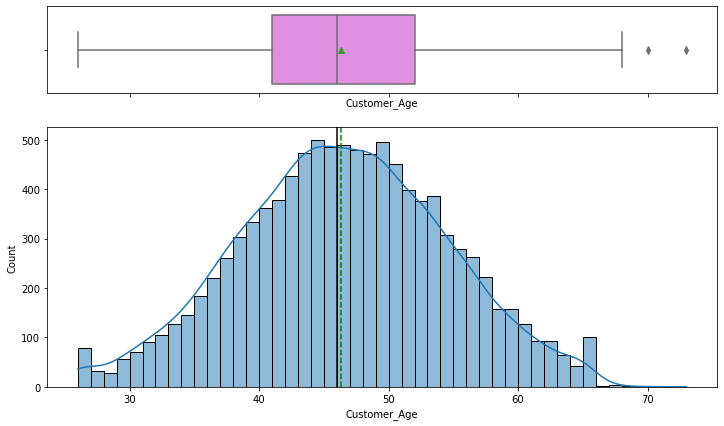

In [29]:
histogram_boxplot(df1, "Customer_Age", kde=True)

- the mean and the median are within same range of 45 - 48 of customer age
- the dataset  has some outliers to the right
- the minimum age is less than 30, max is less than 70 with some outliers above 70 years
- most of the data is between 40 to 50

`Months_on_book`

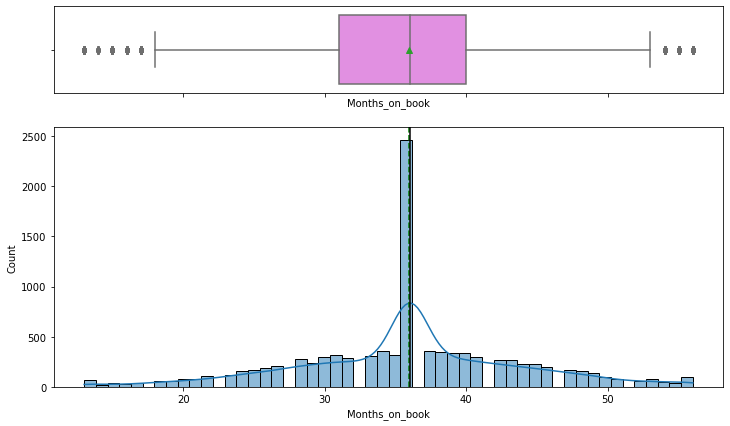

In [31]:
histogram_boxplot(df1, "Months_on_book", kde=True)

- the dataset in column Month_on_book has outliers on both left and right sides of the boxplot
- the datase tis slightly skewed to the left
- both the mean and median are on the same value around 36
- outliers less than 20 to the left, and outliers to the right above 50
- the data highest value is around 36

`Credit_Limit`

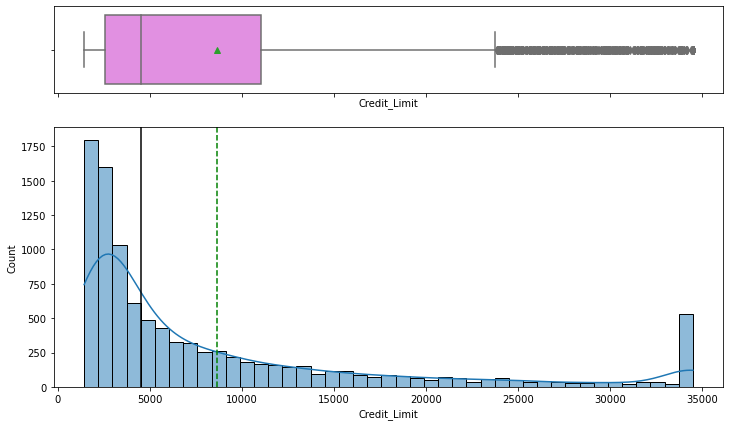

In [34]:
histogram_boxplot(df1, "Credit_Limit", kde=True)

- the dataset in this column is skewed to the right
- the dataset in this column has outliers to the right
- majority of the credit limit is less than 5000
- the mean is around 5000 and the mean 8000
- the column has outliers above 23000
- couple of few customers have credit limit above 23000 

`Total_Revolving_Bal`

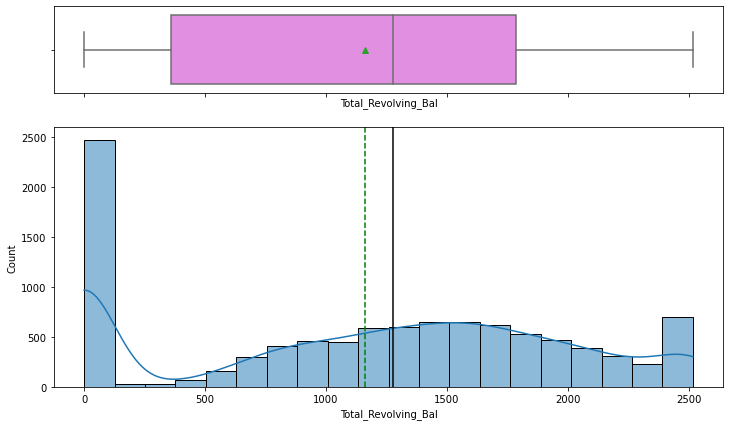

In [36]:
histogram_boxplot(df1, "Total_Revolving_Bal", kde=True)

- the dataset in this column is skewed to the left
- with most of the customers total revolving balance as 0
- the mean and the median are within same range of 1200

`Avg_Open_To_Buy`

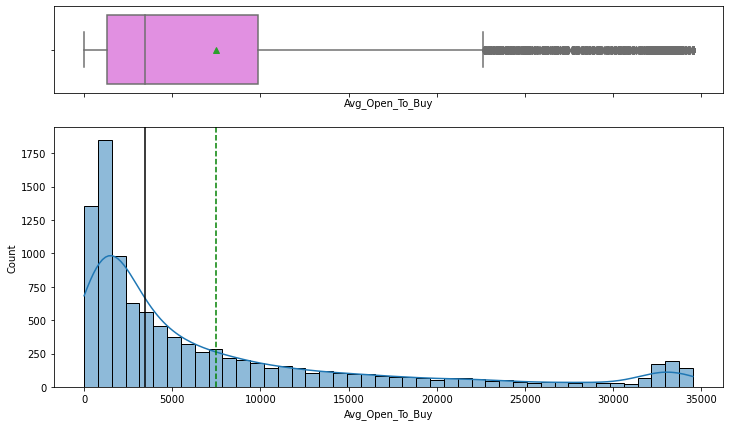

In [37]:
histogram_boxplot(df1, "Avg_Open_To_Buy", kde=True)

- the dataset in this column is skewed to the right
- the dataset  in this column has some outliers to the right
- the mean is less than 5000 and the median is around  7000
- most of the values are less than 5000
- outliers are above 22000

`Total_Trans_Ct`

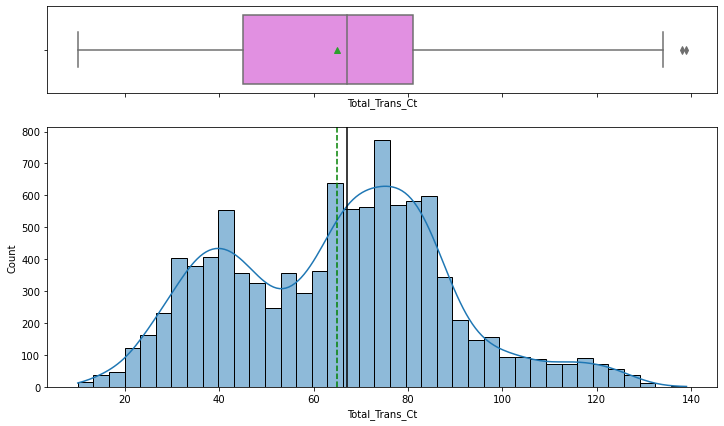

In [38]:
histogram_boxplot(df1, "Total_Trans_Ct", kde=True)

- the dataset in this column has a few outliers to the right
- the dataset slightly skewed to the right
-  the dataset has outliers above 130
- the mean and the median are within the same value 65

`Total_Amt_Chng_Q4_Q1`

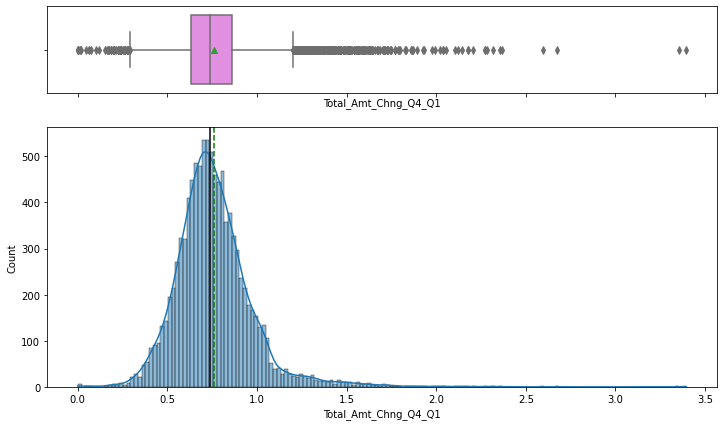

In [39]:
histogram_boxplot(df1, "Total_Amt_Chng_Q4_Q1", kde=True)

- the dataset in this column is skewed to the right
- has outliers to both left and right of the box plot  but mostly to the right
- both the mean and the median are within same value of 0.75
- large amount of outliers to the right from above 1.3 to 3.5

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

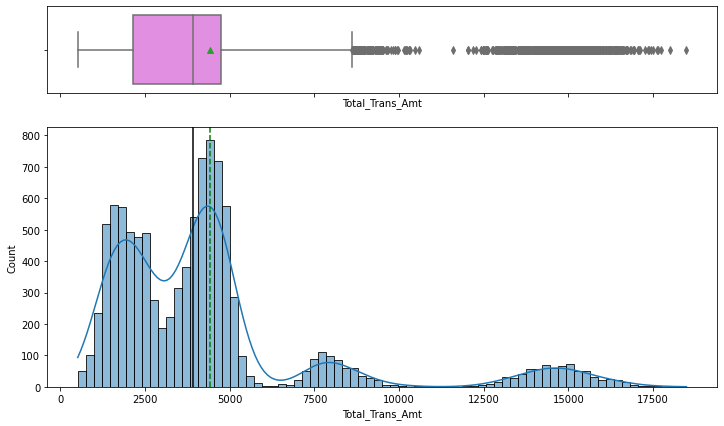

In [40]:
histogram_boxplot(df1, "Total_Trans_Amt", kde=True)

- this column dataset is skewed to the right
- the column has outliers to the right from 8000 to above 17500
- the mean is around 3500 and the median is within same value
most of the dataset values are less 5000

`Total_Ct_Chng_Q4_Q1`

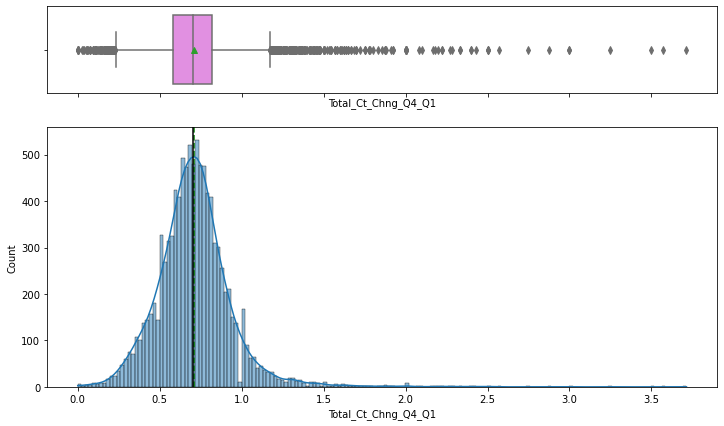

In [41]:
histogram_boxplot(df1, "Total_Ct_Chng_Q4_Q1", kde=True)

- the dataset in this column skewed to the right
- the values in this column has outliers to the right from 1.2 to above 3.5
- both the mean and the median are within same value of 0.75
- majority of the values are less than 1.0

`Avg_Utilization_Ratio`

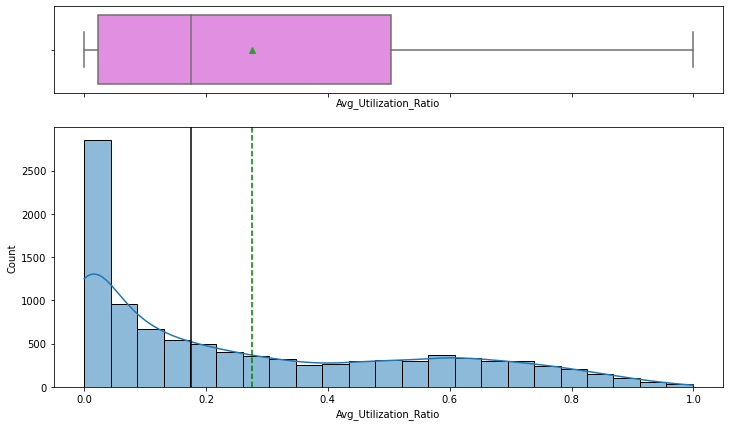

In [42]:
histogram_boxplot(df1, "Avg_Utilization_Ratio", kde=True)

- the dataset in this column skewed to the right
- no outliers
- most of it value is on 0.0
- the mean is 0.18 and the median is 0.215

`Dependent_count`

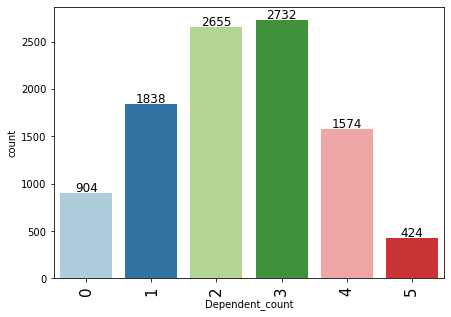

In [51]:
labeled_barplot(data, "Dependent_count")

- dependent of 3 has the highest count of 2732 , next is dependent 2 with count of 2655
- dependent 5 has the lowest count of 424
- dependent 0 has the value count of 904

`Total_Relationship_Count`

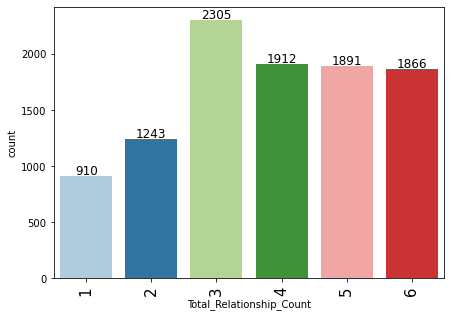

In [52]:
labeled_barplot(data, "Total_Relationship_Count")

- Relationship 3 has the highest count of 2305
- relationship 4, 5 and 6 have similar count values
- the relationship 1 has the lowest count value of 910

`Months_Inactive_12_mon`

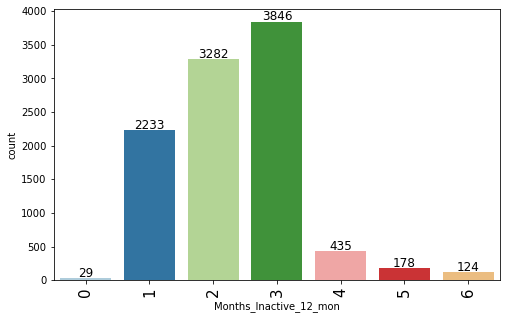

In [53]:
labeled_barplot(data, "Months_Inactive_12_mon")

- 3 has the highest count value of 3846, next to it is 2 with count value of 382
- 0 has the lowest count value of 29

`Contacts_Count_12_mon`

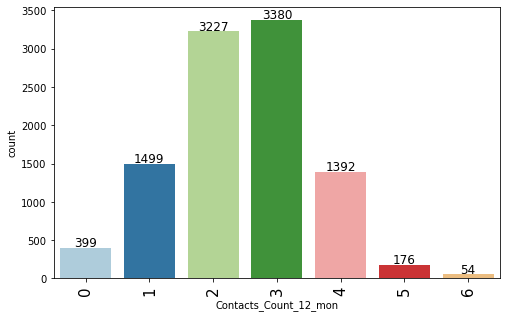

In [54]:
labeled_barplot(data, "Contacts_Count_12_mon")

- 3 has the highest count value of 3380, next is 2 with count value of 3227
- 6 has the lowest count value of 54


`Gender`

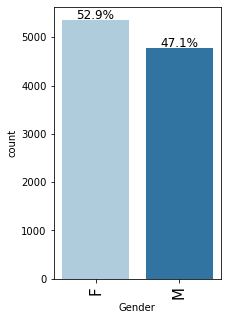

In [50]:
labeled_barplot(data,'Gender',perc=True)

- Female has the highest count value of 5.9%
- Male has the count value of 47.1%

`Marital_Status`

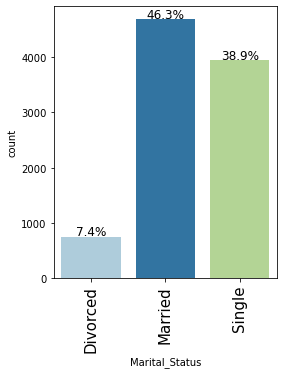

In [56]:
labeled_barplot(data,'Marital_Status',perc=True)

- from the dataset in this column, the customers with marrital status as married is the most 46.3%
- Next to married is single 38.9%
- the least is 7.4%

**Let's see the distribution of the level of income of customers**

`Income_Category`

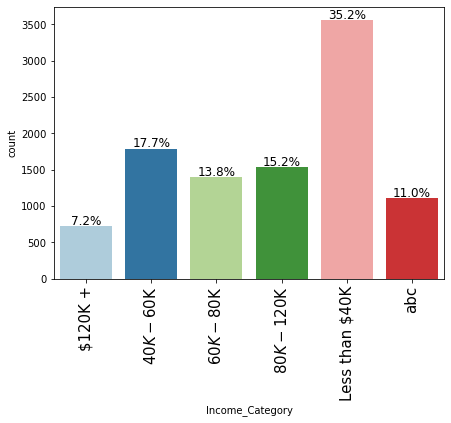

In [57]:
labeled_barplot(data,'Income_Category',perc=True)

- from the column dataset, customers with less than 40k has the most value of 35.2%.
- the least is 120k which is 7.2%

`Card_Category`

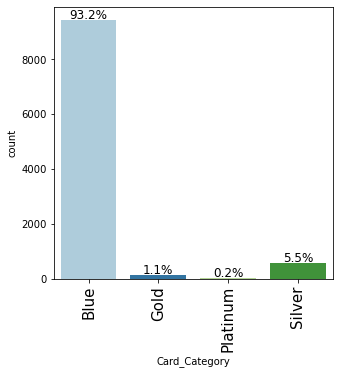

In [58]:
labeled_barplot(data,'Card_Category',perc=True)

- Blue has the most value of 93.2%
- Platinum has the least value of 0.2%

`Attrition_Flag`

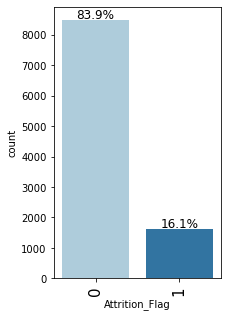

In [59]:
labeled_barplot(data,'Attrition_Flag',perc=True)

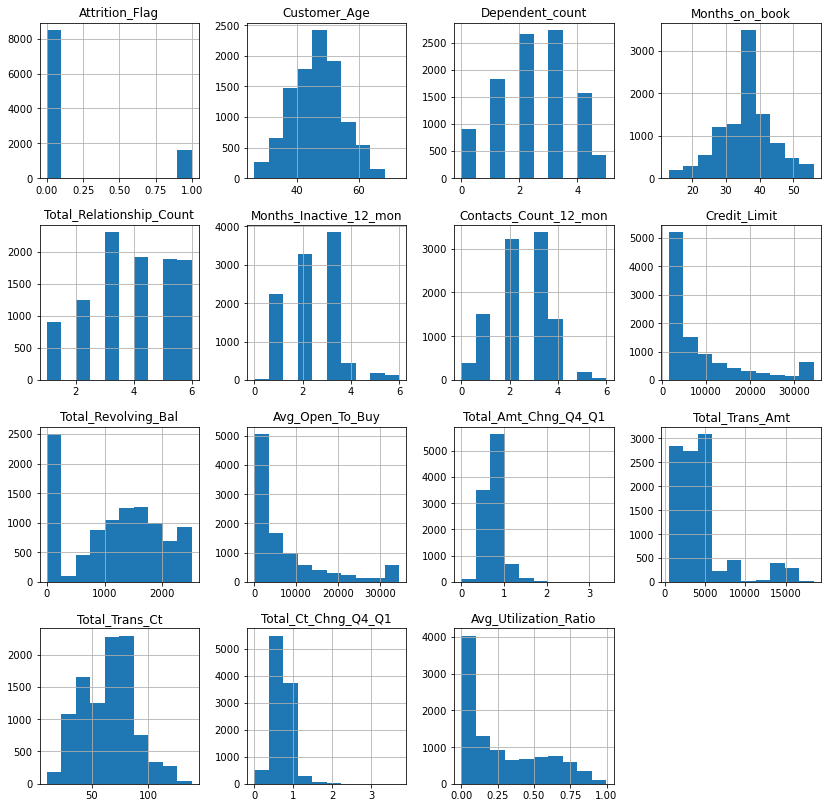

In [60]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

- From the plot above, Attrition_Flag value '0' has 83.9% which is the most. the Customer_Age max is around 50, dependent count has 3 as it most, Month on book has 38 as it max, total relationship count is 3, 3 is the most value for the column of Month_Inactive_12_mon, 3 is the most value for the Contact_count_12_mon, most of the credit_limit is less than 10,000. 0 has the highest value in total_revolving bal, the average open to buy is less than 5000 and has 0 as it most value, total amount change Q4_Q1 has 1 as it most value, Total trans amt has 5000 as it most value, total trans ct has it most value around 75, total ct change Q4_Q1 has it most value less than 1, the avg_utilization_ratio has 0 as it most value

### Bivariate Distributions

**Correlation Check**

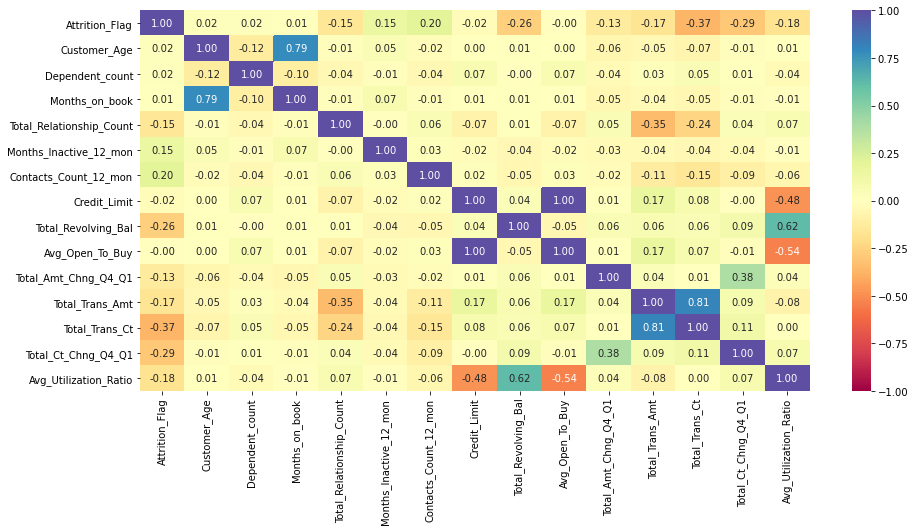

In [61]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Customer_Age is strongly related to Months_on_book
- Total_Revolving_Bal is positvely related to Avg_Utilization_Ratio
- Total_trans_Amt is strongly related to Total_Trans_Ct

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


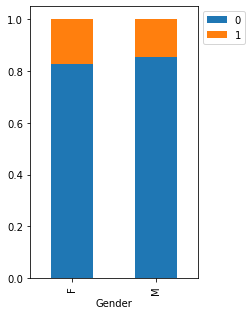

In [62]:
stacked_barplot(data, "Gender", "Attrition_Flag")

- out of 5358 of Female, 930 has attrition 1
- out of 4769 of Male, 697 has attrition 1

`Attrition_Flag vs Marital_Status`

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


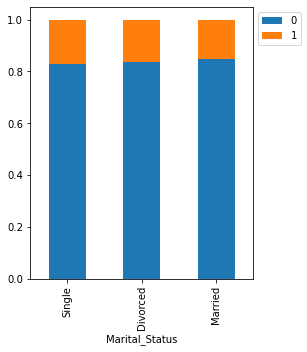

In [63]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

- out of 4687 married in marital_staus, 709 has attrition 1
- out of 3943 single in marital_status, 668 has attrition 1
- out of 748 divorced in marital_status, 121 has attrition 1

`Attrition_Flag vs Education_Level`

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


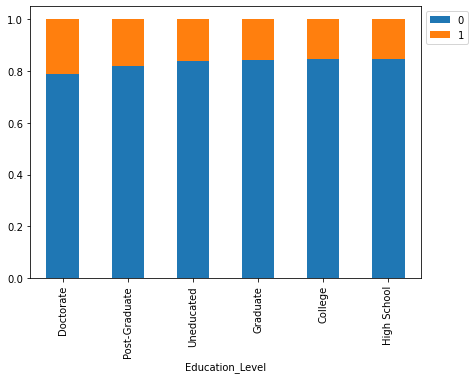

In [65]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

- Graduate has the highest atttrition value 1, with the value count of 3128
- out of High School 2013 in High school,  306 has attrition of 1
- out of the 1487 in Uneducated, 37 has the attrition of 1
- out of 1013 of college, 154 has attrition of 1
- out of 451 of Doctorate, 95 has attrition of 1
- out of 516 of Post_Graduate, 92 has attrition of 1

`Attrition_Flag vs Income_Category`

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


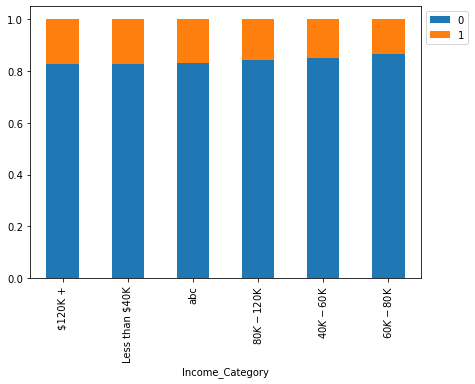

In [197]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

- iut of all the dataset, customers with Income category less than 40k has the highest attrition of 1 with vale count of 612
- Next is the 40k - 60k that has attrition 1 with value count of 271.
- The least is 120k+ with value count 126 that has the attrition of 1

`Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


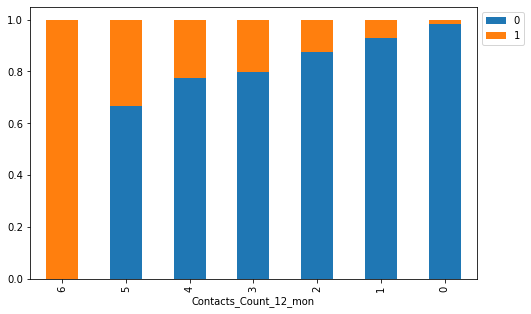

In [68]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

-  out of all the dataset in the plot, contact count 6 has the least value count of attrition 0
- contact count 0 has the least value count of attrition 1 

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


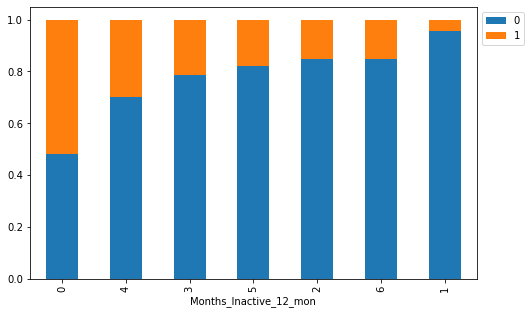

In [69]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

- 3 has the most value 826 for the attrition 1, next is 2 with value count of 505
- the least is 0 with attrition 1

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


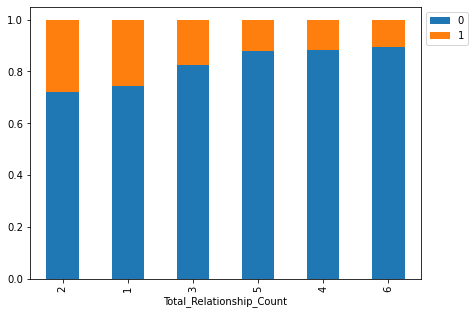

In [70]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

- in the this column of total_relationship_count,  3 has the most value count of 400 in attrition 1
- the least value is 6 with value count of 196 of attrition 1

`Attrition_Flag vs Dependent_count`

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


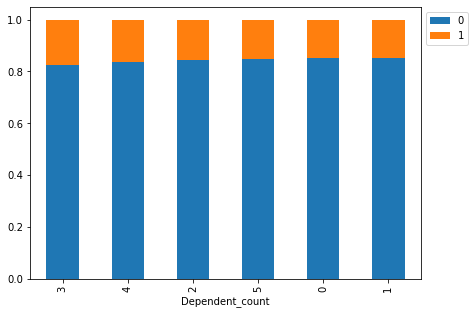

In [71]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

- form the plot above, dependent count 3 has the most value of attrition 1 with value count 485
- the least is 5 with the value count of 64 for attrition 1

`Total_Revolving_Bal` vs `Attrition_Flag`

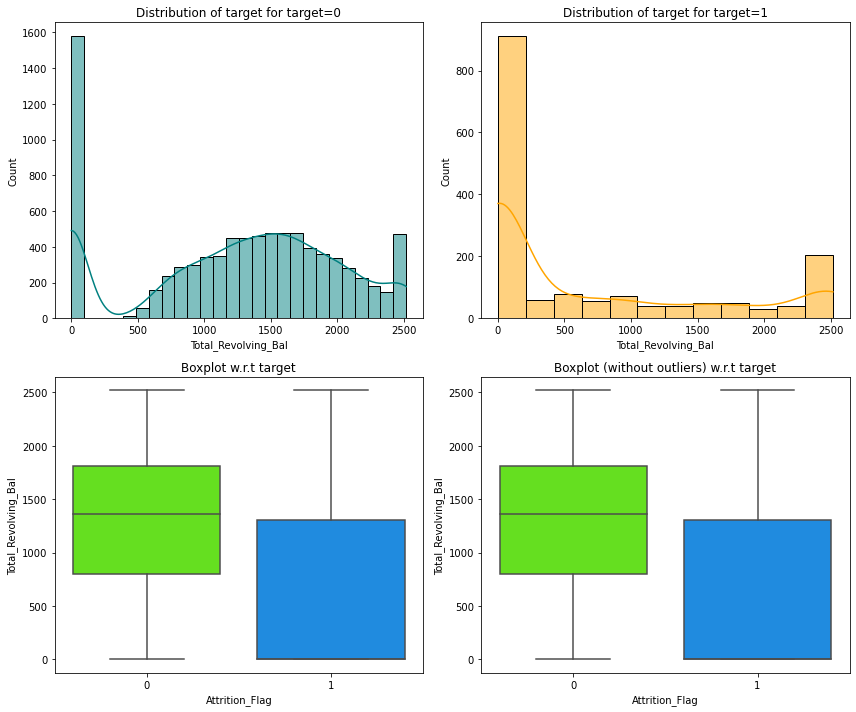

In [76]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

- Total_Revolving_Bal wrt to attrition, the dataset is skewed to the right and attrition 0 has it most value count on rev bal 0
- the average value count for both 0 and 1 in attrition is less than 1500

`Attrition_Flag vs Credit_Limit`

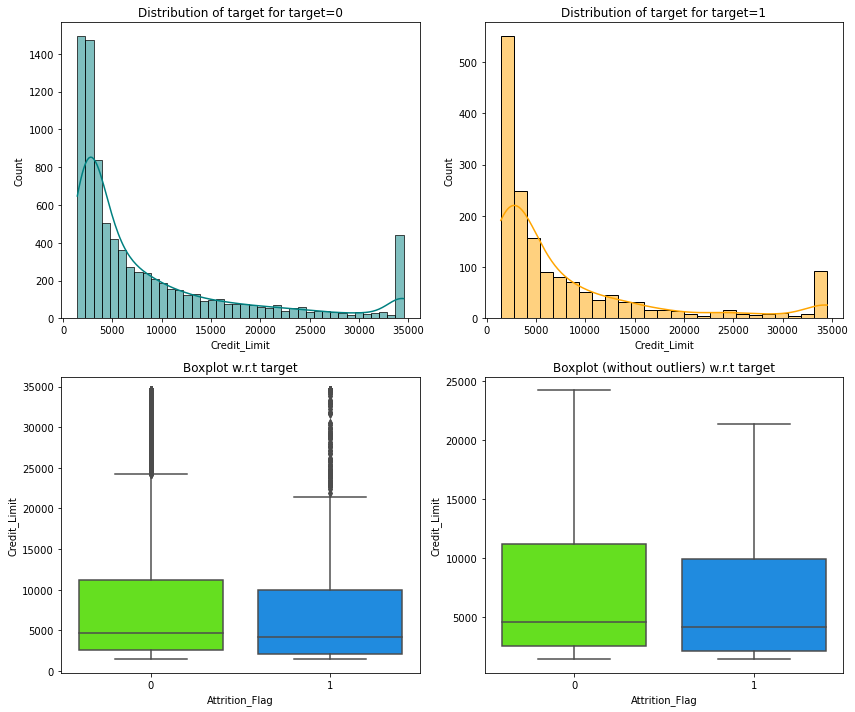

In [77]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

- Credit Limit wrt attrition flag, both values are skewed to the right and majority of it dataset are less than 5000
- In credit limit wrt attrition flag 0, huge value of outliers are present and mean for both 0 and 1 are less than 5000
- Credit Limit wrt attrition flag 1, skewed to the right and mean value is less than 5000

`Attrition_Flag vs Customer_Age`


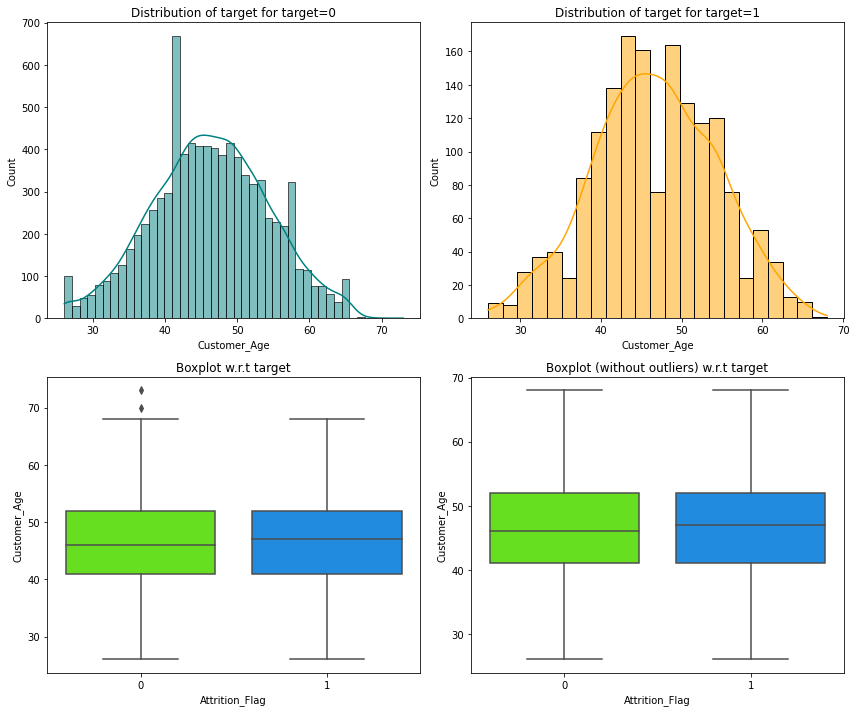

In [78]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

- Customer_Age wrt Attrition, the average age of customers with attrition 0 and 1 are within the same age range 40 - 50

`Total_Trans_Ct` vs `Attrition_Flag`

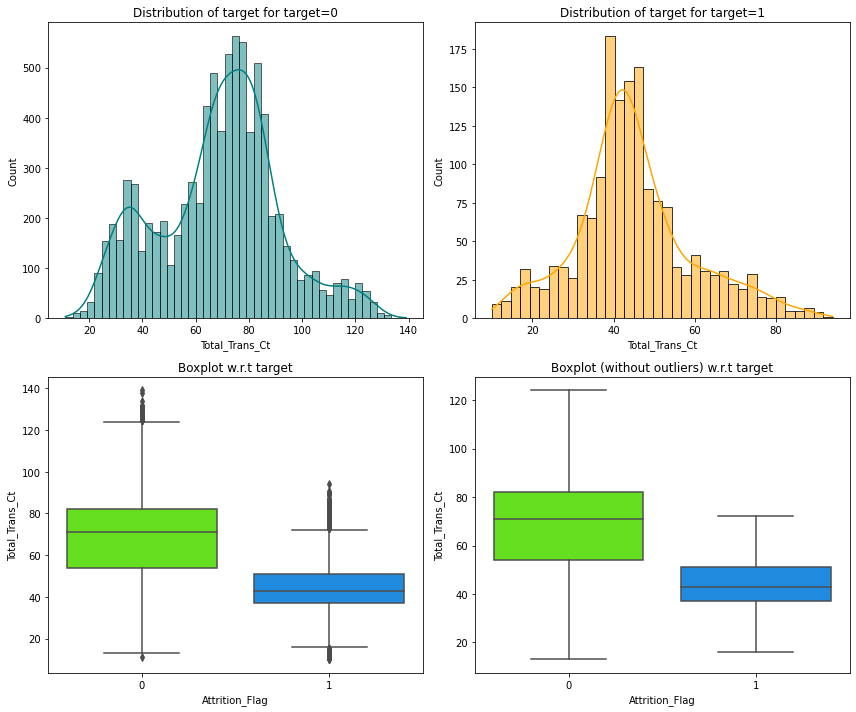

In [79]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

- the average total trans count for attrition 0 is around 70
- the the average total trans count for attrition 1 is 40

`Total_Trans_Amt` vs `Attrition_Flag`

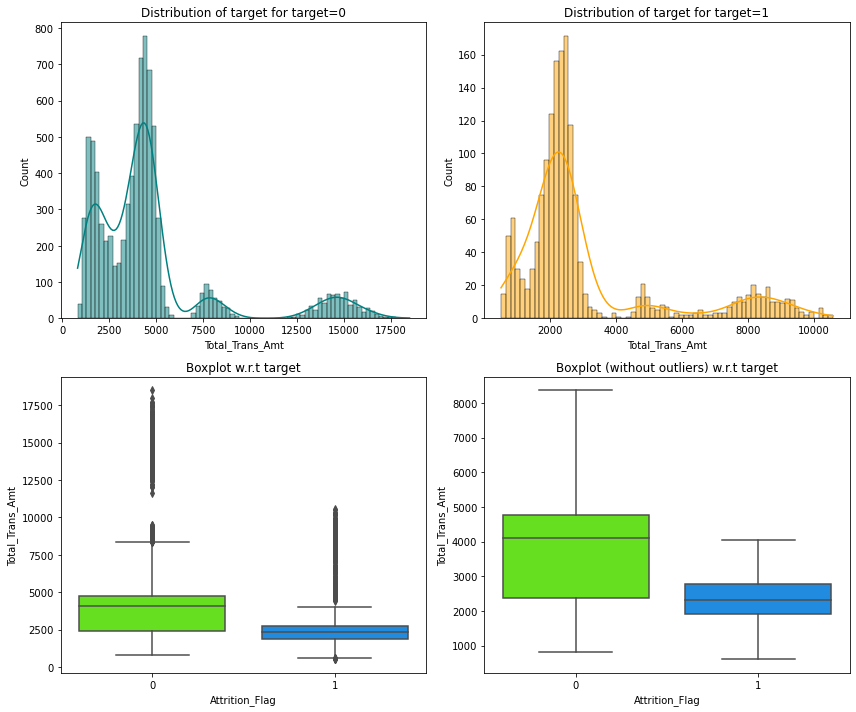

In [80]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

- both values for attrition has outliers wrt to total_trans_amt
- Without outliers, the average total_trans_amt is around 4200 on attrition 0
- For attrition 1, the total_trans_amt average is less than 3000

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

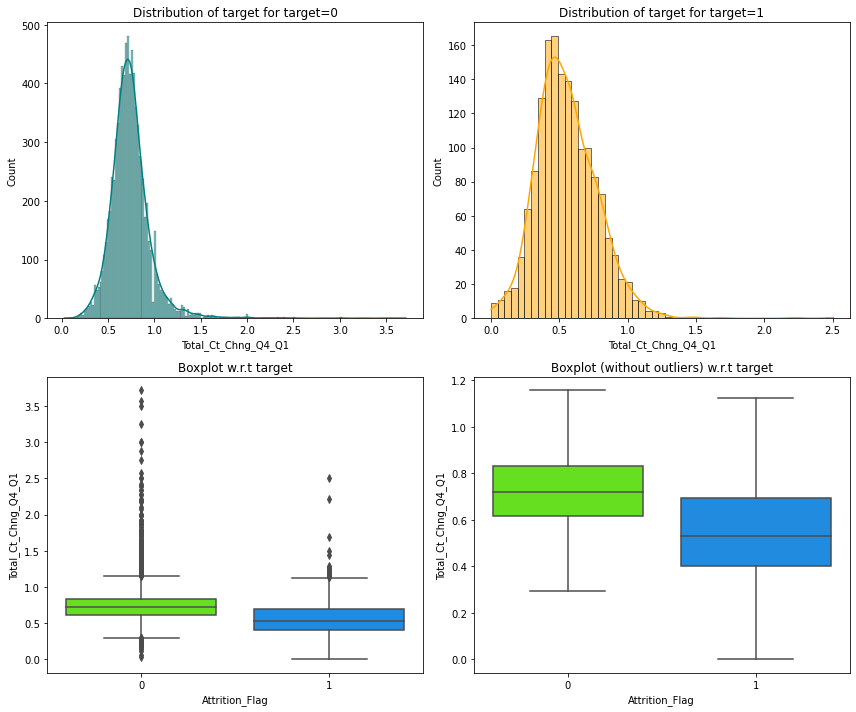

In [81]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

- With outliers, both values for total_ct_chang_Q4_Q1  have outliers for both attrition 0 and 1
- without outliers, the minimum value for attrition 0 is 0.3 and for attrrition 1 is 0.0
- the average total_ct_chang_Q4_Q1 for attrition o is 0.7 and for attrition 1 is 0.5

`Avg_Utilization_Ratio` vs `Attrition_Flag`

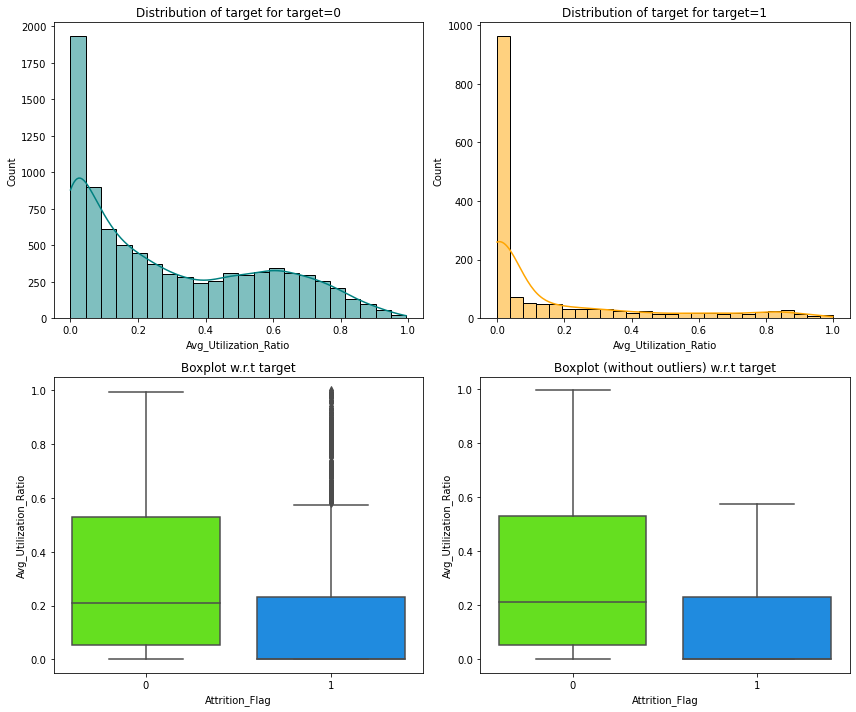

In [82]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

- With outliers, attrition 1 has some outliers
- Without outliers, attrition 0 has average of 0.22 and maximum value as 1.0 on avg_utilization_ratio


`Attrition_Flag vs Months_on_book`

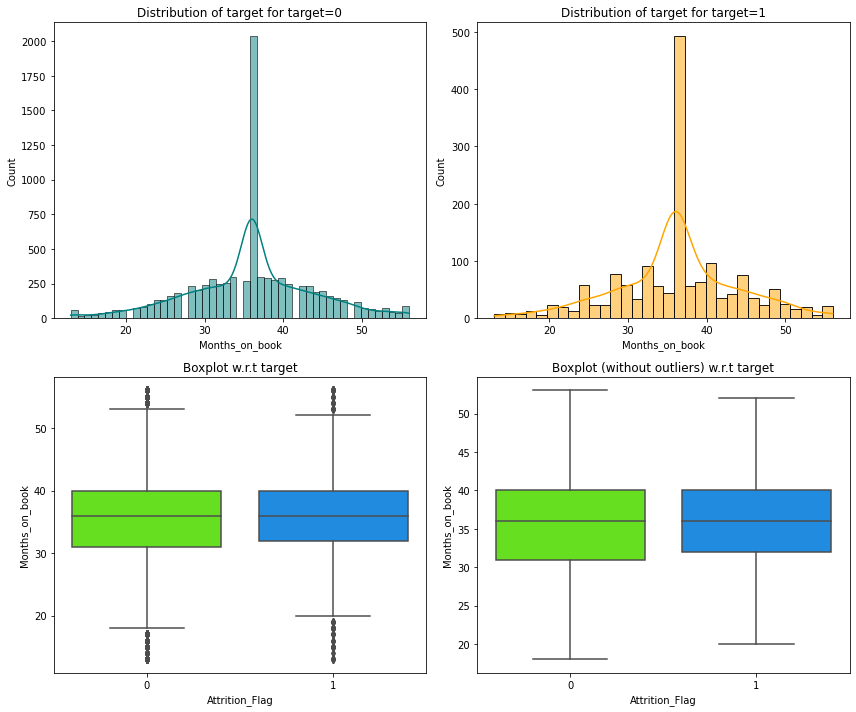

In [83]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

- With outliers, both attrition 0 and 1 have some outliers on both left and right
- Without outliers, attrition 0 has minimum month_on_book less than 20 and maximum value above 50 with the same average value  below 40


`Attrition_Flag vs Total_Revolving_Bal`

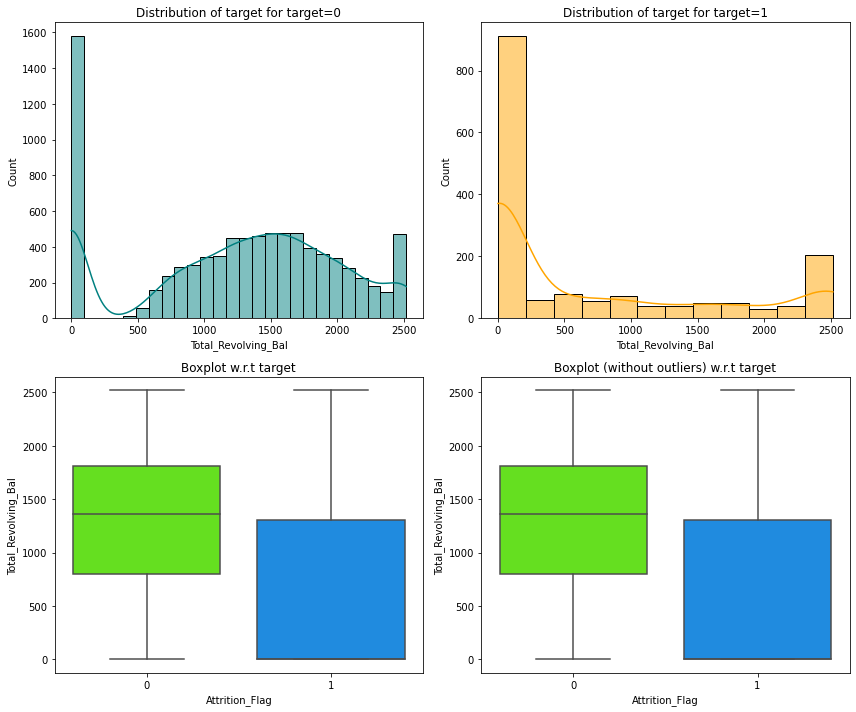

In [84]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

- Both with and without outliers, both values for attrition 0 have the same value of average less than 1500 and the same value of max
- the dataset is skewed to the right

`Attrition_Flag vs Avg_Open_To_Buy`

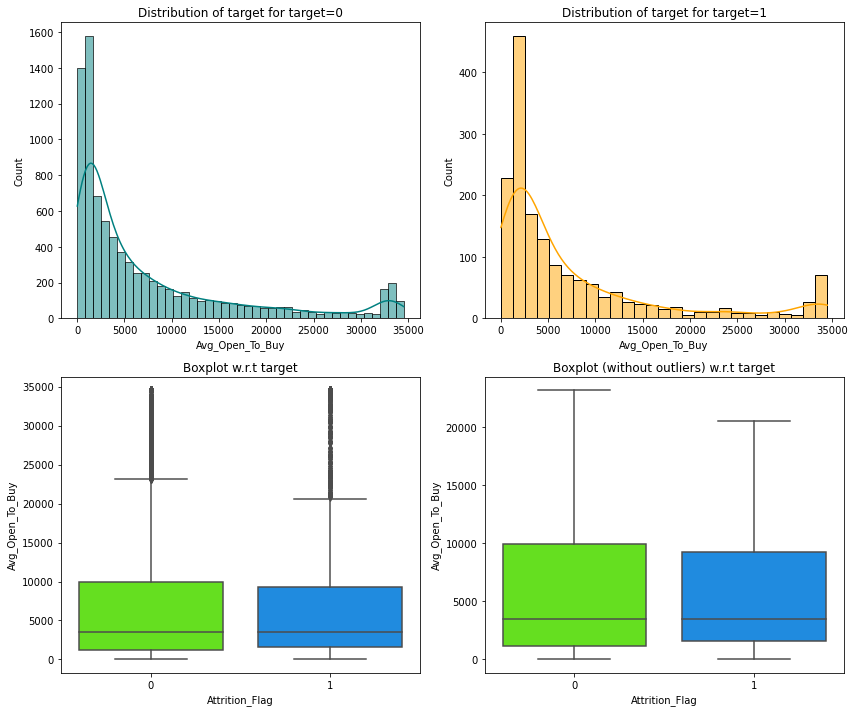

In [85]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

- Both attritions 0 and 1 have outliers and the dataset is skewed to the right
- Both attritions have the same minimum and mean values but attrition 0 has higher avg_open_to_buy value above 20000

## Data Preprocessing

### Outlier Detection

In [86]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [87]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

- Attrition_Flag: has the highest value of outliers with 16%
- Avg_Open_To_Buy: this is next to Attrition_Flag with 9%
- Total_Trans_Amt: this is next to Avg Open To buy with 8%
- Contacts_Count_12_mon: this is next to Total Trans Amt with 6%
- Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1, Months_on_book, Months_Inactive_12_mon  : these are next to Contacts Count with 3% each
- others are less than 1%

### Train-Test Split

In [94]:
# creating the copy of the dataframe
data1 = data.copy()

In [95]:
data["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'abc'], dtype=object)

In [96]:
data1["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'abc'], dtype=object)

In [98]:
#replacing value 'abc' with nan
data1["Income_Category"].replace('abc', np.nan, inplace=True)

In [99]:
data1["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', nan], dtype=object)

In [101]:
# checking for missing values
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

- from the dataset above, columns Education_Level, Marital_Status, Income_Category all have missing values and need to be imputed

In [102]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [103]:
# Spliting train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [104]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


- X_train has 6075 rows and 19 columns
- X_val has 2026 rows and 19 columns
- X_test has 2026 rows and 19 columns

In [107]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


### Missing-Value Imputation and Treatment

In [105]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [106]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# fit and transform the imputer on train data
X_train[reqd_col_for_impute] = imp_mode.fit_transform(X_train[reqd_col_for_impute])

# Transform on validation and test data
X_val[reqd_col_for_impute] = imp_mode.transform(X_val[reqd_col_for_impute])

# fit and transform the imputer on test data
X_test[reqd_col_for_impute] = imp_mode.transform(X_test[reqd_col_for_impute])

In [108]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

- There are no missing values

In [109]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


In [110]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         917
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1100
Single       770
Divorced     156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    957
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


In [111]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


In [112]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


In [113]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


- Atfer encoding all dataset, there are now 29 columns
- But the rows remain the same

In [114]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40,2,21,6,4,3,20056.000,1602,18454.000,0.466,1687,46,0.533,0.080,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
498,44,1,34,6,2,0,2885.000,1895,990.000,0.387,1366,31,0.632,0.657,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4356,48,4,36,5,1,2,6798.000,2517,4281.000,0.873,4327,79,0.881,0.370,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
407,41,2,36,6,2,0,27000.000,0,27000.000,0.610,1209,39,0.300,0.000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
8728,46,4,36,2,2,3,15034.000,1356,13678.000,0.754,7737,84,0.750,0.090,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


- All values are now either in int64, or float or numbers data types

## Model Building

In [116]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [117]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

### Model Building - Original Data

In [124]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.985655737704918
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
dtree: 1.0

Validation Performance:

Bagging: 0.8128834355828221
Random forest: 0.7975460122699386
GBM: 0.8558282208588958
Adaboost: 0.852760736196319
dtree: 0.8159509202453987


- both in training and validation, GBM Performance is the best with 0.855 then next is Adaboost performance 0.852

### Model Training and Performance Difference

In [125]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9857, Validation Score: 0.8129, Difference: 0.1728
Random forest: Training Score: 1.0000, Validation Score: 0.7975, Difference: 0.2025
GBM: Training Score: 0.8750, Validation Score: 0.8558, Difference: 0.0192
Adaboost: Training Score: 0.8268, Validation Score: 0.8528, Difference: -0.0259
dtree: Training Score: 1.0000, Validation Score: 0.8160, Difference: 0.1840


- Base on  the performance on both training and validation GBM has the best performance even by Difference 0.0192
- Next is Adaboost performance in validation

### Model Building - Oversampled Data

In [126]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



- After oversampling, the count of labels have been balanced unlike before oversampling that the dataset were imbalanced.

In [132]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9974504804863699
Random forest: 1.0
GBM: 0.980976662090606
Adaboost: 0.9690135320651108
dtree: 1.0

Validation Performance:

Bagging: 0.8496932515337423
Random forest: 0.8680981595092024
GBM: 0.8926380368098159
Adaboost: 0.901840490797546
dtree: 0.8251533742331288


In [133]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9975, Validation Score: 0.8497, Difference: 0.1478
Random forest: Training Score: 1.0000, Validation Score: 0.8681, Difference: 0.1319
GBM: Training Score: 0.9810, Validation Score: 0.8926, Difference: 0.0883
Adaboost: Training Score: 0.9690, Validation Score: 0.9018, Difference: 0.0672
dtree: Training Score: 1.0000, Validation Score: 0.8252, Difference: 0.1748


- After oversampling all the models have improved both in training and validation performance
- Adaboost has the best performance in validation performance to 90% from 85%
- Next is GBM has improved from 85% to 89% in validation performance

### Model Building - Undersampled Data

In [134]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [135]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



- Before Under sampling label count shows that the data split is imbalance
- After under sampling label count is balanced

In [136]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9805327868852459
Adaboost: 0.9528688524590164
dtree: 1.0

Validation Performance:

Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
GBM: 0.9570552147239264
Adaboost: 0.9601226993865031
dtree: 0.9202453987730062


In [137]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9908, Validation Score: 0.9294, Difference: 0.0613
Random forest: Training Score: 1.0000, Validation Score: 0.9387, Difference: 0.0613
GBM: Training Score: 0.9805, Validation Score: 0.9571, Difference: 0.0235
Adaboost: Training Score: 0.9529, Validation Score: 0.9601, Difference: -0.0073
dtree: Training Score: 1.0000, Validation Score: 0.9202, Difference: 0.0798


- After dataset has been under sampled, All models have improved in validation performance.
- Compared to the validation performance after over sampling, under sampled dataset validation performance has improved in all models
- Adaboost has dropped in training performance from 96% to 95%,  then improved in validation performance from 90% to 96%
- GBM has slightly dropped in train performance from 0.9810 to 0.9805 and improved in validation performance from 0.892 to 0.9571
- After building 15 models, it was observed that both the GBM and Adaboost models, trained on an undersampled dataset, as well as the GBM model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
- I will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before

### Hyperparameter Tuning

#### Tuning AdaBoost using original data

In [143]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.949811616954474:
Wall time: 1min 36s


In [175]:
tuned_ada2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_ada2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [168]:
# Checking model's performance on training set
ada2_train = model_performance_classification_sklearn(tuned_ada2, X_train, y_train)
ada2_train

,Accuracy,Recall,Precision,F1
0,0.957,1.000,0.787,0.881


- Data in training performance are all 100%. focusing on Recall

In [178]:
# Checking model's performance on validation set
ada2_val = model_performance_classification_sklearn(tuned_ada2, X_val, y_val)
ada2_val

,Accuracy,Recall,Precision,F1
0,0.969,0.871,0.934,0.902


- The model performed well with recall at 87% on validation set
- The model shows some sense of overfitting on the training dataset at 100%

### Tuning  Gradient Boosting model with Undersampled Data

In [149]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.954924123495552:
Wall time: 1min 44s


In [179]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [170]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.996,0.998,0.995,0.996


In [171]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.947,0.954,0.770,0.852


- Recall has improved on validation performance to 95%
- Better than Adaboost original dataset

#### Tuning Gradient Boosting using original data

In [153]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.954924123495552:
Wall time: 2min 12s


In [180]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [183]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train, y_train)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.988,0.949,0.975,0.962


In [184]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.969,0.883,0.923,0.903


- Recall slightly dropped on train performance dataset to 94%
- Recall has dropped on validation performance to 88%

#### Tuning XGBoost Model with Original data


In [185]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.941585557299843:
Wall time: 48.9 s


In [160]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=1,
    scale_pos_weight=10,
    n_estimators=50,
    learning_rate=0.05,
    gamma=5,
)

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [188]:
# Checking model's performance on training set
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.948,1.000,0.754,0.860


In [189]:
# Checking model's performance on training set
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.931,0.954,0.713,0.816


- Recall has train performance 100%
- Recall has validation performance 95%
- some form of overfitting on the training data

## Model Comparison and Final Model Selection

In [192]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        ada2_train.T,
        xgb_train.T,
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "XGBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,XGBoost trained with Original data
Accuracy,0.996,0.988,0.957,0.948
Recall,0.998,0.949,1.000,1.000
Precision,0.995,0.975,0.787,0.754
F1,0.996,0.962,0.881,0.860


In [193]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, ada2_val.T, xgb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "XGBoost trained with Original data"
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data,XGBoost trained with Original data
Accuracy,0.947,0.969,0.969,0.931
Recall,0.954,0.883,0.871,0.954
Precision,0.770,0.923,0.934,0.713
F1,0.852,0.903,0.902,0.816


- XGBoost trained with Original data has generalised performance, i would consider it as the best model

In [194]:
# Let's check the performance on test set
XGB_test = model_performance_classification_sklearn(tuned_xgb, X_test, y_test)
XGB_test

,Accuracy,Recall,Precision,F1
0,0.927,0.966,0.696,0.809


- The XGBoost model trained with original data has given ~97% recall on the test set
- this performance is closed to the trained data and validation data set
- therefore, this is a generalized model.

### Feature Importancem

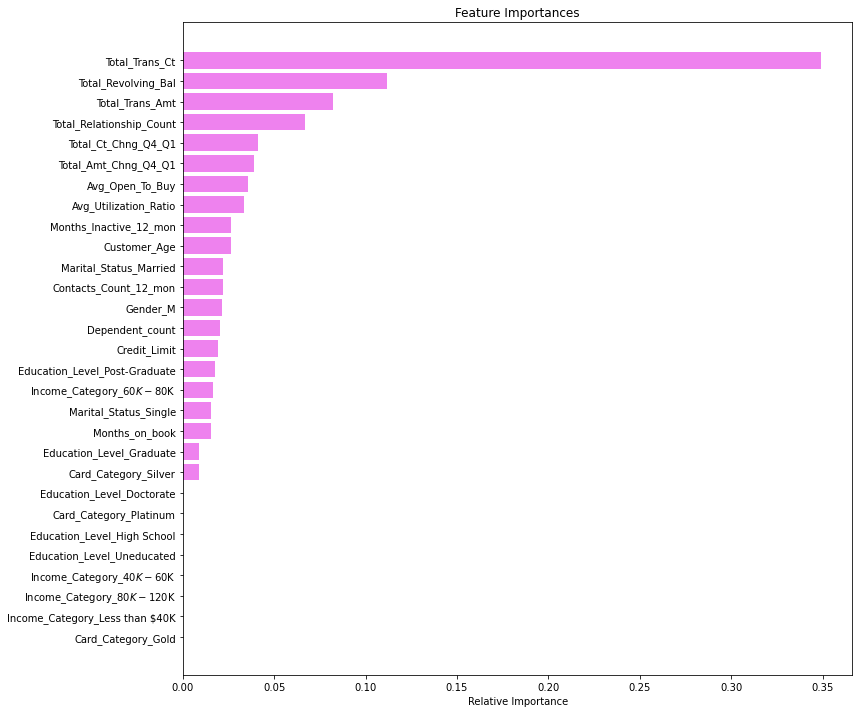

In [196]:
feature_names = X_train.columns
importances = tuned_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- From the plot above, we can see that Total_Trans_Ct is the most important feature, next are Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count for making predictions

# Business Insights and Conclusions


- More Priority should be given to customers with high Transaction count, as they show high potentials to use use credit card services
- Also customers with low revolving balance should be considered for credit card services and possibily could improve overtime.
- Customers with low transaction amount may not be a good fit for the credit cards services, as they may not consider the services neccessary
- Customers that use alot of the bank's products and services, show interest in the business and should be considered for credit card services
- Customers that are not consistent with change in transactions amount and count may not be able to keep up with the credit services. therefore, the bank would have to review it policy as regards to them
- customers that subscribe to buy credit line, should be considered for credit services
- customers with low average utilization ratio, may not be considered for the credit card services and should be asked why in order to improve in the bank customers services
- Customers with high Monthly inactive status per annum, may not be considered for the credit services and enquiries should be made as to why